In [2]:
from Input_function import import_data1
import numpy as np
import matplotlib.pyplot as plt
import torch as t
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from scipy.stats import pearsonr
from scipy.optimize import curve_fit

In [3]:

#from NeuralNetNSP import Net
path = "D:\\OneDrive - Indian Institute of Science\\4th Sem\\NSP\\NSP-Grant-Proposal\\MATLAB-COde\\forPython.mat"
[train_attributes, train_labels, test_attributes, test_labels] = import_data1(path)
#jupyter nbextension enable varInspector/main



class Net(nn.Module):

    def __init__(self):
        '''
        n0 = 11
        n1 = 7
        n2 = 4
        super(Net, self).__init__()  # calling base class
        self.fc1 = nn.Linear(n0, n1)  # input is 11x1
        # self.init_weights(self.fc1)
        nn.init.xavier_uniform_(self.fc1.weight)
        # print(self.fc1.weight)
        self.fc2 = nn.Linear(n1, n2)
        # self.init_weights(self.fc2)
        nn.init.xavier_uniform_(self.fc1.weight)
        # print(self.fc2.weight)
        self.fc3 = nn.Linear(n2, 1)
        # self.init_weights(self.fc3)
        nn.init.xavier_uniform_(self.fc1.weight)
        # print(self.fc3.weight) '''
        n0 = 11
        n1 = 5
        n2 = 1
        super(Net, self).__init__()  # calling base class
        self.fc1 = nn.Linear(n0, n1, bias=True)  # input is 11x1
        # self.init_weights(self.fc1)
        nn.init.xavier_uniform_(self.fc1.weight)
        # print(self.fc1.weight)
        self.fc2 = nn.Linear(n1, n2, bias=False)
        # self.init_weights(self.fc2)
        nn.init.xavier_uniform_(self.fc1.weight)
        # print(self.fc2.weight)

        # print(self.fc3.weight)

    '''def init_weights(self,m):
        if isinstance(m):
            nn.init.xavier_uniform(m.weight)

    '''

    def forward(self, x):
        '''x = F.relu(self.fc1(x))
        # print(x)
        # assert x.size == n1
        x = F.relu(self.fc2(x))
        # print(x)
        x = t.sigmoid(self.fc3(x))  # change t to f if it doesn't work
        # print(x)'''
        x = F.relu(self.fc1(x))
        # print(x)
        # assert x.size == n1 )
        x = t.sigmoid(self.fc2(x))  # change t to f if it doesn't work
        # print(x)
        return x


In [4]:
net = Net()
print(net)
optimizer = optim.SGD(net.parameters(), lr=0.005)
num_epochs = 30000
lambda1 = 0.01
lambda3=0
lambda2 = 0
losses=np.zeros(num_epochs//100)
batch_size = len(train_attributes)
num_batches=len(train_attributes+batch_size-1)//batch_size
inpt=t.tensor(train_attributes).float()
targets=t.tensor(train_labels).float()
for i in range(num_epochs):
    for j in range(num_batches):
        ranges=(j*batch_size,max((j+1)*batch_size,len(inpt)))
        inp=inpt[ranges[0]:ranges[1]]
        target=targets[ranges[0]:ranges[1]]
        optimizer.zero_grad()
        output =net(inp)
        criterion = nn.MSELoss()
        lin_params = t.cat([x.view(-1) for x in net.fc1.parameters()])
        L1_regularisation = lambda1 * t.norm(lin_params, 1)
        #L1_regularisation = lambda1 * t.norm(lin_params, 1)+lambda3 * t.norm(lin_params, 2)
        #lin_params2 = t.cat([x.view(-1) for x in net.fc2.parameters()])
        L1_regularisation1 = lambda2 * t.norm(lin_params, 2)
        loss = criterion(output, target)+L1_regularisation +L1_regularisation1
        #loss = t.corrcoef(t.stack([output,target],1))[0][1]+L1_regularisation
        loss.backward()
        optimizer.step()
        if i%100==0 and j==0:
            losses[i//100]=float(loss.data)
print(losses[-1])

Net(
  (fc1): Linear(in_features=11, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=1, bias=False)
)
0.008347484283149242


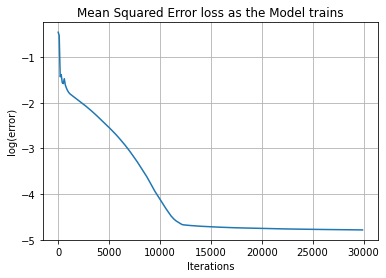

In [5]:

plt.plot(range(0,len(losses)*100,100),np.log(losses))
plt.title("Mean Squared Error loss as the Model trains")
plt.xlabel("Iterations")
plt.ylabel("log(error)")
plt.grid(visible='major')
plt.show()

In [6]:
def f(x, a, b):
    return a*x+b
def plotter(x,y,name):
    fig,ax=plt.subplots(2)
    fig.set_size_inches(6,9)
    fig.set_dpi = 100
    fig.set_facecolor('lightgray')
    fig.suptitle(name)

    ax[0].plot(x)
    ax[0].plot(y)
    ax[0].set_title("Our score and BIS score in ")
    ax[0].legend(["Our Data","Bis Score"])
    ax[0].set_ylabel("Awakenesss score")
    ax[0].set_xlabel("Time in multiples of 20s")
    ax[0].grid(visible='major')

    ax[1].grid(visible='both')
    ax[1].scatter(x,y,marker='.',s=2)
    ax[1].set_xlabel("Our Score")
    ax[1].set_ylabel("BIS score")
    ax[1].set_title("Correlation of the two score")
    plt.tight_layout()

    [popt,pcov]=curve_fit(f,x,y)
    fitz=f(x,popt[0],popt[1])
    ax[1].plot(x,fitz,color='red',linestyle='--')

    plt.tight_layout()
    plt.show()

The loss for the training data is  tensor(0.0074)
The Training data pearson correlation  between BIS and our score is (0.7455450443329535, 1.0169093437253923e-186)


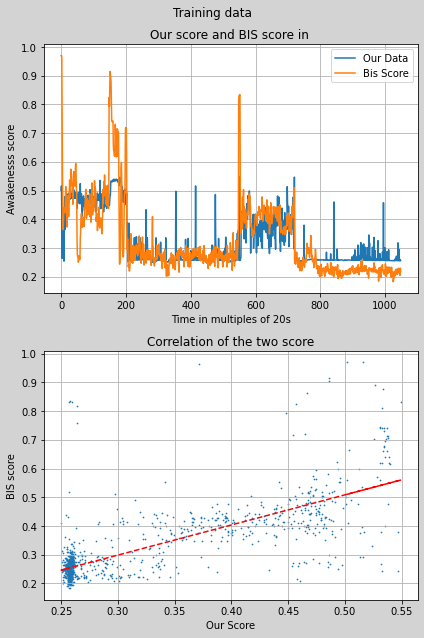

The loss for the test data is  tensor(0.0062)
The Test data pearson correlation  between BIS and our score is (0.6782449290126744, 2.6598258456857507e-28)


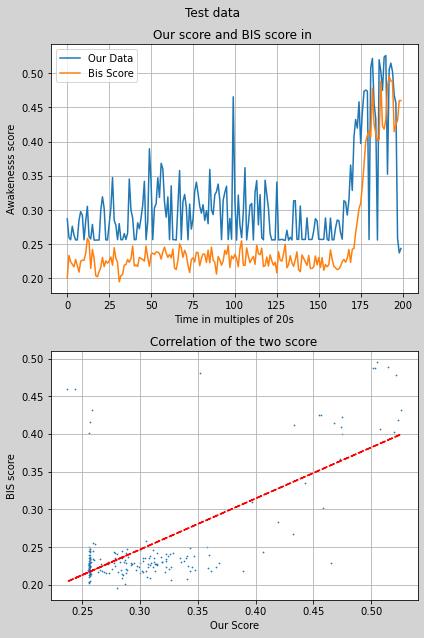

In [7]:
inp = t.tensor(train_attributes).float()
output = net(inp)
target = t.tensor(train_labels)
criterion = nn.MSELoss()
loss = criterion(output, target)
print("The loss for the training data is " ,loss.data)
y = np.array(target.data).flatten()
x = np.array(output.data).flatten()
print("The Training data pearson correlation  between BIS and our score is", pearsonr(x, y))

plotter(x,y, "Training data")

inp = t.tensor(test_attributes).float()
output = net(inp)
target = t.tensor(test_labels)
criterion = nn.MSELoss()
loss = criterion(output, target)
print("The loss for the test data is " ,loss.data)
y = np.array(target.data).flatten()
x = np.array(output.data).flatten()
print("The Test data pearson correlation  between BIS and our score is", pearsonr(x, y))
plotter(x,y, "Test data")

In [8]:
[x.view(-1) for x in net.fc1.parameters()]

[tensor([ 1.5599e-05, -3.4418e-05, -4.6792e-05,  1.3138e-05, -1.0316e-05,
         -4.6479e-05, -4.6168e-05,  5.0340e-06, -2.9153e-05,  9.0010e-06,
          1.7804e-05, -4.3318e-05, -3.1912e-05,  3.0137e-05,  4.6712e-05,
         -3.2057e-05, -4.8478e-05,  3.0880e-05, -6.3283e-06, -2.2902e-05,
          1.2356e-06, -6.9943e-06,  3.0343e-02,  6.3940e-05,  3.5619e-03,
          6.1730e-05, -1.2153e-06,  2.2094e-04,  7.1938e-05,  2.1375e-05,
          2.4422e-05, -3.0043e-05, -1.4294e-05, -4.9503e-05, -4.8631e-05,
          1.0809e-05, -4.0624e-05,  1.5690e-05,  7.4364e-06,  1.5156e-05,
         -8.0783e-06,  3.0135e-05, -9.2554e-06,  4.5169e-05,  3.1723e-02,
          1.7937e-05,  1.9295e-05, -2.2846e-05, -4.4914e-05, -2.9160e-02,
         -1.9478e-05, -1.7443e-05,  3.1458e-05,  3.0543e-05, -3.1295e-05],
        grad_fn=<ViewBackward0>),
 tensor([-4.1898e-05, -2.0186e-05, -3.9179e-05,  2.9900e-05, -2.9690e-05],
        grad_fn=<ViewBackward0>)]